In [31]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [32]:
!pip install nltk

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

In [35]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Put the hyparameters at the top like this to make it easier to change and edit.

In [45]:
vocab_size = 20000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

First, let's define two lists that containing articles and labels. In the meantime, we remove stopwords.

In [46]:
articles = []
labels = []

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

2225
2225


There are only 2,225 articles in the data. Then we split into training set and validation set, according to the parameter we set earlier, 80% for training, 20% for validation.

In [47]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

1780
1780
1780
445
445


Tokenizer does all the heavy lifting for us. In our articles that it was tokenizing, it will take 5,000 most common words. oov_token is to put a special value in when an unseen word is encountered. This means I want "OOV" in bracket to be used to for words that are not in the word index. "fit_on_text" will go through all the text and create dictionary like this:

In [48]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index

You can see that "OOV" in bracket is number 1, "said" is number 2, "mr" is number 3, and so on.

In [49]:
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10}

This process cleans up our text, lowercase, and remove punctuations.

After tokenization, the next step is to turn thoes tokens into lists of sequence.

In [50]:
train_sequences = tokenizer.texts_to_sequences(train_articles)

This is the 11th article in the training data that has been turned into sequences.

In [51]:
print(train_sequences[10])

[2431, 8718, 225, 4996, 22, 641, 587, 225, 4996, 7154, 11247, 1661, 8719, 9796, 2431, 22, 565, 6120, 7155, 140, 278, 13483, 140, 278, 796, 823, 662, 2307, 7155, 1145, 1692, 17556, 1719, 4997, 13484, 6586, 7850, 17557, 13485, 4738, 9797, 6121, 122, 4514, 13486, 2, 2873, 1505, 352, 4739, 17558, 52, 341, 6122, 352, 2171, 3963, 41, 22, 3795, 17559, 17560, 17561, 7155, 542, 13487, 9798, 7156, 835, 631, 2366, 347, 4740, 7851, 365, 22, 13486, 787, 2367, 13488, 4302, 138, 10, 7155, 3664, 682, 3532, 6587, 22, 7155, 414, 823, 662, 7154, 90, 13, 633, 6586, 225, 4996, 7850, 599, 13489, 1692, 1021, 7850, 4998, 808, 1863, 117, 11248, 9797, 6121, 2973, 22, 8720, 99, 278, 7155, 1606, 4999, 542, 492, 7155, 1443, 4741, 778, 1320, 7852, 1860, 10, 33, 641, 319, 7157, 62, 478, 565, 301, 1506, 22, 479, 13490, 7853, 1664, 7158, 797, 6588, 3066, 11249, 1364, 6, 13491, 2431, 565, 22, 2970, 4735, 7158, 13492, 7158, 13493, 17562, 850, 39, 1824, 675, 297, 26, 979, 13494, 882, 22, 361, 22, 13, 301, 1506, 1342, 374

When we train neural networks for NLP, we need sequences to be in the same size, that's why we use padding. Our max_length is 200, so we use pad_sequences to make all of our articles the same length which is 200 in my example. That's why you see that the 1st article was 426 in length, becomes 200, the 2nd article was 192 in length, becomes 200, and so on.

In [52]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [53]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

425
200
192
200
186
200


In addtion, there is padding type and truncating type, there are all "post". Means for example, for the 11th article, it was 186 in length, we padded to 200, and we padded at the end, add 14 zeros.

In [54]:
print(train_sequences[10])

[2431, 8718, 225, 4996, 22, 641, 587, 225, 4996, 7154, 11247, 1661, 8719, 9796, 2431, 22, 565, 6120, 7155, 140, 278, 13483, 140, 278, 796, 823, 662, 2307, 7155, 1145, 1692, 17556, 1719, 4997, 13484, 6586, 7850, 17557, 13485, 4738, 9797, 6121, 122, 4514, 13486, 2, 2873, 1505, 352, 4739, 17558, 52, 341, 6122, 352, 2171, 3963, 41, 22, 3795, 17559, 17560, 17561, 7155, 542, 13487, 9798, 7156, 835, 631, 2366, 347, 4740, 7851, 365, 22, 13486, 787, 2367, 13488, 4302, 138, 10, 7155, 3664, 682, 3532, 6587, 22, 7155, 414, 823, 662, 7154, 90, 13, 633, 6586, 225, 4996, 7850, 599, 13489, 1692, 1021, 7850, 4998, 808, 1863, 117, 11248, 9797, 6121, 2973, 22, 8720, 99, 278, 7155, 1606, 4999, 542, 492, 7155, 1443, 4741, 778, 1320, 7852, 1860, 10, 33, 641, 319, 7157, 62, 478, 565, 301, 1506, 22, 479, 13490, 7853, 1664, 7158, 797, 6588, 3066, 11249, 1364, 6, 13491, 2431, 565, 22, 2970, 4735, 7158, 13492, 7158, 13493, 17562, 850, 39, 1824, 675, 297, 26, 979, 13494, 882, 22, 361, 22, 13, 301, 1506, 1342, 374

In [55]:
print(train_padded[10])

[ 2431  8718   225  4996    22   641   587   225  4996  7154 11247  1661
  8719  9796  2431    22   565  6120  7155   140   278 13483   140   278
   796   823   662  2307  7155  1145  1692 17556  1719  4997 13484  6586
  7850 17557 13485  4738  9797  6121   122  4514 13486     2  2873  1505
   352  4739 17558    52   341  6122   352  2171  3963    41    22  3795
 17559 17560 17561  7155   542 13487  9798  7156   835   631  2366   347
  4740  7851   365    22 13486   787  2367 13488  4302   138    10  7155
  3664   682  3532  6587    22  7155   414   823   662  7154    90    13
   633  6586   225  4996  7850   599 13489  1692  1021  7850  4998   808
  1863   117 11248  9797  6121  2973    22  8720    99   278  7155  1606
  4999   542   492  7155  1443  4741   778  1320  7852  1860    10    33
   641   319  7157    62   478   565   301  1506    22   479 13490  7853
  1664  7158   797  6588  3066 11249  1364     6 13491  2431   565    22
  2970  4735  7158 13492  7158 13493 17562   850   

And for the 1st article, it was 426 in length, we truncated to 200, and we truncated at the end.

In [56]:
print(train_sequences[0])

[91, 160, 1142, 1107, 49, 979, 755, 6569, 89, 1304, 4289, 129, 175, 3653, 1214, 1195, 1575, 42, 7, 893, 91, 6099, 334, 85, 20, 14, 130, 3261, 1215, 2421, 570, 451, 1375, 58, 3379, 3522, 1659, 8, 921, 730, 10, 844, 17503, 9, 598, 1576, 1108, 395, 1940, 1107, 731, 49, 537, 1397, 2010, 1621, 134, 249, 113, 2355, 795, 4981, 980, 584, 10, 3958, 3959, 921, 2562, 129, 344, 175, 3653, 7822, 5317, 39, 62, 2866, 28, 9, 4723, 18, 1305, 136, 416, 7, 143, 1422, 71, 4501, 436, 4982, 91, 1108, 77, 6100, 82, 2011, 53, 7823, 91, 6, 1008, 609, 89, 1304, 91, 1963, 131, 137, 420, 9, 2867, 38, 152, 1235, 89, 1304, 4724, 7, 436, 4982, 3153, 6, 2492, 8701, 431, 1127, 7824, 1423, 571, 1216, 1901, 13452, 766, 9, 537, 1397, 2010, 134, 2068, 400, 845, 1964, 1599, 34, 1715, 2868, 5318, 5319, 2422, 244, 9, 2624, 82, 732, 6, 1173, 1196, 152, 720, 591, 9773, 124, 28, 1305, 1688, 432, 83, 933, 115, 20, 14, 18, 3154, 17504, 37, 1484, 13453, 23, 37, 87, 335, 2356, 37, 467, 255, 1964, 1358, 328, 5700, 299, 732, 1174, 18

In [57]:
print(train_padded[0])

[   91   160  1142  1107    49   979   755  6569    89  1304  4289   129
   175  3653  1214  1195  1575    42     7   893    91  6099   334    85
    20    14   130  3261  1215  2421   570   451  1375    58  3379  3522
  1659     8   921   730    10   844 17503     9   598  1576  1108   395
  1940  1107   731    49   537  1397  2010  1621   134   249   113  2355
   795  4981   980   584    10  3958  3959   921  2562   129   344   175
  3653  7822  5317    39    62  2866    28     9  4723    18  1305   136
   416     7   143  1422    71  4501   436  4982    91  1108    77  6100
    82  2011    53  7823    91     6  1008   609    89  1304    91  1963
   131   137   420     9  2867    38   152  1235    89  1304  4724     7
   436  4982  3153     6  2492  8701   431  1127  7824  1423   571  1216
  1901 13452   766     9   537  1397  2010   134  2068   400   845  1964
  1599    34  1715  2868  5318  5319  2422   244     9  2624    82   732
     6  1173  1196   152   720   591  9773   124   

Then we do the same for the validation sequences. Note that we should expect more out of vocabulary words from validation articles because word index were derived from the training articles.

In [58]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 200)


Now we are going to look at the labels. because our labels are text, so we will tokenize them, when training, labels are expected to be numpy arrays. So we will turn list of labels into numpy arrays like so:

In [68]:
print(set(labels))

{'entertainment', 'business', 'tech', 'sport', 'politics'}


In [60]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

In [76]:
label_tokenizer.word_index

{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}

In [61]:
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


Before training deep neural network, we want to explore what our original article and article after padding look like. Running the following code, we explore the 11th article, we can see that some words become "OOV", because they did not make to the top 5,000.

In [62]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

berlin cheers anti nazi film german movie anti nazi resistance heroine drawn loud applause berlin film festival sophie scholl final days portrays final days member white rose movement scholl 21 arrested beheaded brother hans 1943 distributing leaflets condemning abhorrent tyranny adolf hitler director marc rothemund said feeling responsibility keep legacy scholls going must somehow keep ideas alive added film drew transcripts gestapo interrogations scholl trial preserved archive communist east germany secret police discovery inspiration behind film rothemund worked closely surviving relatives including one scholl sisters ensure historical accuracy film scholl members white rose resistance group first started distributing anti nazi leaflets summer 1942 arrested dropped leaflets munich university calling day reckoning adolf hitler regime film focuses six days scholl arrest intense trial saw scholl initially deny charges ended defiant appearance one three german films vying top prize fest

Now we can implement LSTM. Here is my code that I build a tf.keras.Sequential model and start with an embedding layer. An embedding layer stores one vector per word. When called, it converts the sequences of word indices into sequences of vectors. After training, words with similar meanings often have the similar vectors.

Next is how to implement LSTM in code. The Bidirectional wrapper is used with a LSTM layer, this propagates the input forwards and backwards through the LSTM layer and then concatenates the outputs. This helps LSTM to learn long term dependencies. We then fit it to a dense neural network to do classification.

This index-lookup is much more efficient than the equivalent operation of passing a one-hot encoded vector through a tf.keras.layers.Dense layer.

In [63]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 390       
Total params: 1,354,694
Trainable params: 1,354,694
Non-trainable params: 0
_________________________________________________________________


In our model summay, we have our embeddings, our Bidirectional contains LSTM, followed by two dense layers. The output from Bidirectional is 128, because it doubled what we put in LSTM. We can also stack LSTM layer but I found the results worse.

In [64]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/20
56/56 - 6s - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2313 - val_accuracy: 0.9393
Epoch 2/20
56/56 - 6s - loss: 6.8062e-04 - accuracy: 1.0000 - val_loss: 0.2353 - val_accuracy: 0.9393
Epoch 3/20
56/56 - 6s - loss: 4.6482e-04 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.9416
Epoch 4/20
56/56 - 6s - loss: 3.2936e-04 - accuracy: 1.0000 - val_loss: 0.2375 - val_accuracy: 0.9393
Epoch 5/20
56/56 - 6s - loss: 2.4279e-04 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9393
Epoch 6/20
56/56 - 6s - loss: 1.8737e-04 - accuracy: 1.0000 - val_loss: 0.2403 - val_accuracy: 0.9393
Epoch 7/20
56/56 - 6s - loss: 1.4999e-04 - accuracy: 1.0000 - val_loss: 0.2412 - val_accuracy: 0.9393
Epoch 8/20
56/56 - 6s - loss: 1.2438e-04 - accuracy: 1.0000 - val_loss: 0.2410 - val_accuracy: 0.9393
Epoch 9/20
56/56 - 6s - loss: 1.0606e-04 - accuracy: 1.0000 - val_loss: 0.2424 - val_accuracy: 0.9416
Epoch 10/20
56/56 - 6s - loss: 9.1878e-05 - accuracy: 1.0000 - val_loss: 0.2434 - val_

In [42]:
!pip install matplotlib

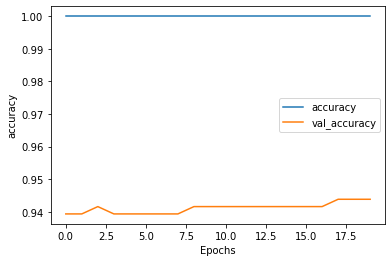

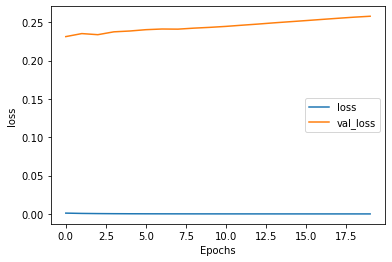

In [69]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [70]:
txt = ["A WeWork shareholder has taken the company to court over the near-$1.7bn (£1.3bn) leaving package approved for ousted co-founder Adam Neumann."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
pred

array([[2.1468757e-08, 9.9999487e-01, 3.2503504e-08, 1.0811288e-07,
        1.0476536e-08, 5.0495801e-06]], dtype=float32)

In [79]:
txt = ["yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round.  the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading  who beat slough in the second round. conference side exeter city  who knocked out doncaster on saturday  will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united  who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park.  a number of premiership teams face difficult away games against championship sides on the weekend of 8/9 january. third-placed everton visit plymouth  liverpool travel to burnley  crystal palace go to sunderland  fulham face carling cup semi-finalists watford  bolton meet ipswich  while aston villa were drawn against sheffield united. premiership strugglers norwich  blackburn  west brom are away at west ham  cardiff and preston north end respectively. southampton visit northampton  having already beaten the league two side in the carling cup earlier this season. middlesbrough were drawn away against either swindon or notts county  while spurs entertain brighton at white hart lane.  arsenal v stoke  swindon/notts co v middlesbrough  man utd v exeter  plymouth v everton  leicester v blackpool  derby v wigan  sunderland v crystal palace  wolves v millwall  yeading v newcastle  hull v colchester  tottenham v brighton  reading v stockport/swansea  birmingham v leeds  hartlepool v boston  milton keynes dons v peterborough  oldham v man city  chelsea v scunthorpe  cardiff v blackburn  charlton v rochdale  west ham v norwich  sheff utd v aston villa  preston v west brom  rotherham v yeovil  burnley v liverpool  bournemouth v chester  coventry v crewe  watford v fulham  ipswich v bolton  portsmouth v gillingham  northampton v southampton  qpr v nottm forest  luton v hinckley/brentford  matches to be played on weekend of 8/9 january."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment','unknown']
#{'sport': 1, 'business': 2, 'politics': 3, 'tech': 4, 'entertainment': 5}
print(pred, labels[np.argmax(pred)])

[[2.1433118e-08 9.9993944e-01 1.1084168e-07 3.7909661e-08 9.5222701e-09
  6.0458875e-05]] bussiness


In [80]:
np.argmax(pred)

1